In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
imported = pd.read_csv('logs_dress_all2.csv')

df = imported[['timeStamp', 'elapsed','label','threadName','success', 'responseCode', 'grpThreads','allThreads','Latency','IdleTime','Connect']]
df.head()

,timeStamp,elapsed,label,threadName,success,responseCode,grpThreads,allThreads,Latency,IdleTime,Connect
0,1688695066761,1707,RTSA_GetDetails_Token,Thread Group 1-1,True,200,1,1,1701,0,1578
1,1688695068505,89,Sales_OrderImport_Token,Thread Group 1-1,True,200,1,1,89,0,0
2,1688695068596,399,TnT Token Request,Thread Group 1-1,True,200,1,1,397,0,130
3,1688695069622,3933,BG_LOAD_RTSA_GetDetails,RTSA_GetDetails 2-1,True,200,10,22,3933,0,123
4,1688695069634,326,BG_LOAD_TnT_Enquiry,TnT_Enquiry 4-1,True,200,4,9,325,0,101


In [3]:
pd.unique(df['label'])

array(['RTSA_GetDetails_Token', 'Sales_OrderImport_Token',
       'TnT Token Request', 'BG_LOAD_RTSA_GetDetails',
       'BG_LOAD_TnT_Enquiry', 'BG_Load_SalesOrder', 'Token Request',
       'RTSA_10Th_6000/hr', 'RTSA_50Th_15000/hr', 'TNT_10Th_1000/hr',
       'TNT_10Th_20000/hr', 'RTSA_10Th_MAX', 'RTSA_50Th_MAX',
       'RTSA_75Th_MAX', 'QSL_returns_1Th', 'QSL_returns_2Th',
       'QSL_returns_5Th', 'Sales_Order_1Th', 'Sales_Order_2Th',
       'Sales_Order_5Th', 'WG_1Th', 'WG_2Th', 'WG_5Th'], dtype=object)

In [4]:
unique_labels = df['label'].unique()

# Create a dictionary to store the dataframes
label_dataframes = {}

# Create a dataframe for each unique label value
for label in unique_labels:
    label_dataframes[label] = df[df['label'] == label]

# Accessing the dataframe for a specific label
example_label_dataframe = label_dataframes['BG_LOAD_RTSA_GetDetails']

In [5]:
example_label_dataframe.head()

,timeStamp,elapsed,label,threadName,success,responseCode,grpThreads,allThreads,Latency,IdleTime,Connect
3,1688695069622,3933,BG_LOAD_RTSA_GetDetails,RTSA_GetDetails 2-1,True,200,10,22,3933,0,123
5,1688695069723,3832,BG_LOAD_RTSA_GetDetails,RTSA_GetDetails 2-2,True,200,10,22,3832,0,83
7,1688695069822,4540,BG_LOAD_RTSA_GetDetails,RTSA_GetDetails 2-3,True,200,10,22,4539,0,94
9,1688695069923,4437,BG_LOAD_RTSA_GetDetails,RTSA_GetDetails 2-4,True,200,10,22,4437,0,100
11,1688695070023,4225,BG_LOAD_RTSA_GetDetails,RTSA_GetDetails 2-5,True,200,10,22,4225,0,97


In [6]:

# Assuming you have already created the label_dataframes dictionary as shown in the previous response

# Create a dictionary to store the new dataframes
interval_dataframes = {}

# Define the interval duration in seconds (30 seconds in this case)
interval_duration = pd.Timedelta(seconds=30)

# Iterate over the label_dataframes dictionary
for label, d in label_dataframes.items():
    dataframe = d.copy()
    # Convert the 'timeStamp' column to datetime if it's not already
    dataframe['timeStamp'] = pd.to_datetime(dataframe['timeStamp'],unit='ms')
    
    # Set the 'timeStamp' column as the dataframe index
    dataframe.set_index('timeStamp', inplace=True)
    
    # Resample the dataframe to 30-second intervals and calculate the average of 'elapsed' and the count of values
    resampled_df = dataframe.resample(interval_duration).agg({'Latency': np.mean, 'threadName': 'count'})
    # Rename the columns to 'average_elapsed' and 'value_count'
    resampled_df.rename(columns={'Latency': 'avg_res', 'threadName': 'txn_per_sec'}, inplace=True)
    resampled_df['txn_per_sec'] = resampled_df['txn_per_sec'] / 30
    
    # Add the resampled dataframe to the interval_dataframes dictionary
    interval_dataframes[label] = resampled_df

# Accessing the dataframe for a specific label
example_label_dataframe = interval_dataframes['BG_LOAD_RTSA_GetDetails']

In [7]:
example_label_dataframe.head()

,avg_res,txn_per_sec
timeStamp,,
2023-07-07 01:57:30,2867.90,0.666667
2023-07-07 01:58:00,1701.44,1.666667
2023-07-07 01:58:30,1358.78,1.666667
2023-07-07 01:59:00,1439.16,1.666667
2023-07-07 01:59:30,1380.12,1.666667


RTSA_GetDetails_Token
Sales_OrderImport_Token
BG_LOAD_RTSA_GetDetails
BG_LOAD_TnT_Enquiry
BG_Load_SalesOrder
RTSA_10Th_6000/hr
RTSA_50Th_15000/hr
TNT_10Th_1000/hr
TNT_10Th_20000/hr
RTSA_10Th_MAX
RTSA_50Th_MAX
RTSA_75Th_MAX
QSL_returns_1Th
QSL_returns_2Th
QSL_returns_5Th
Sales_Order_1Th
Sales_Order_2Th
Sales_Order_5Th


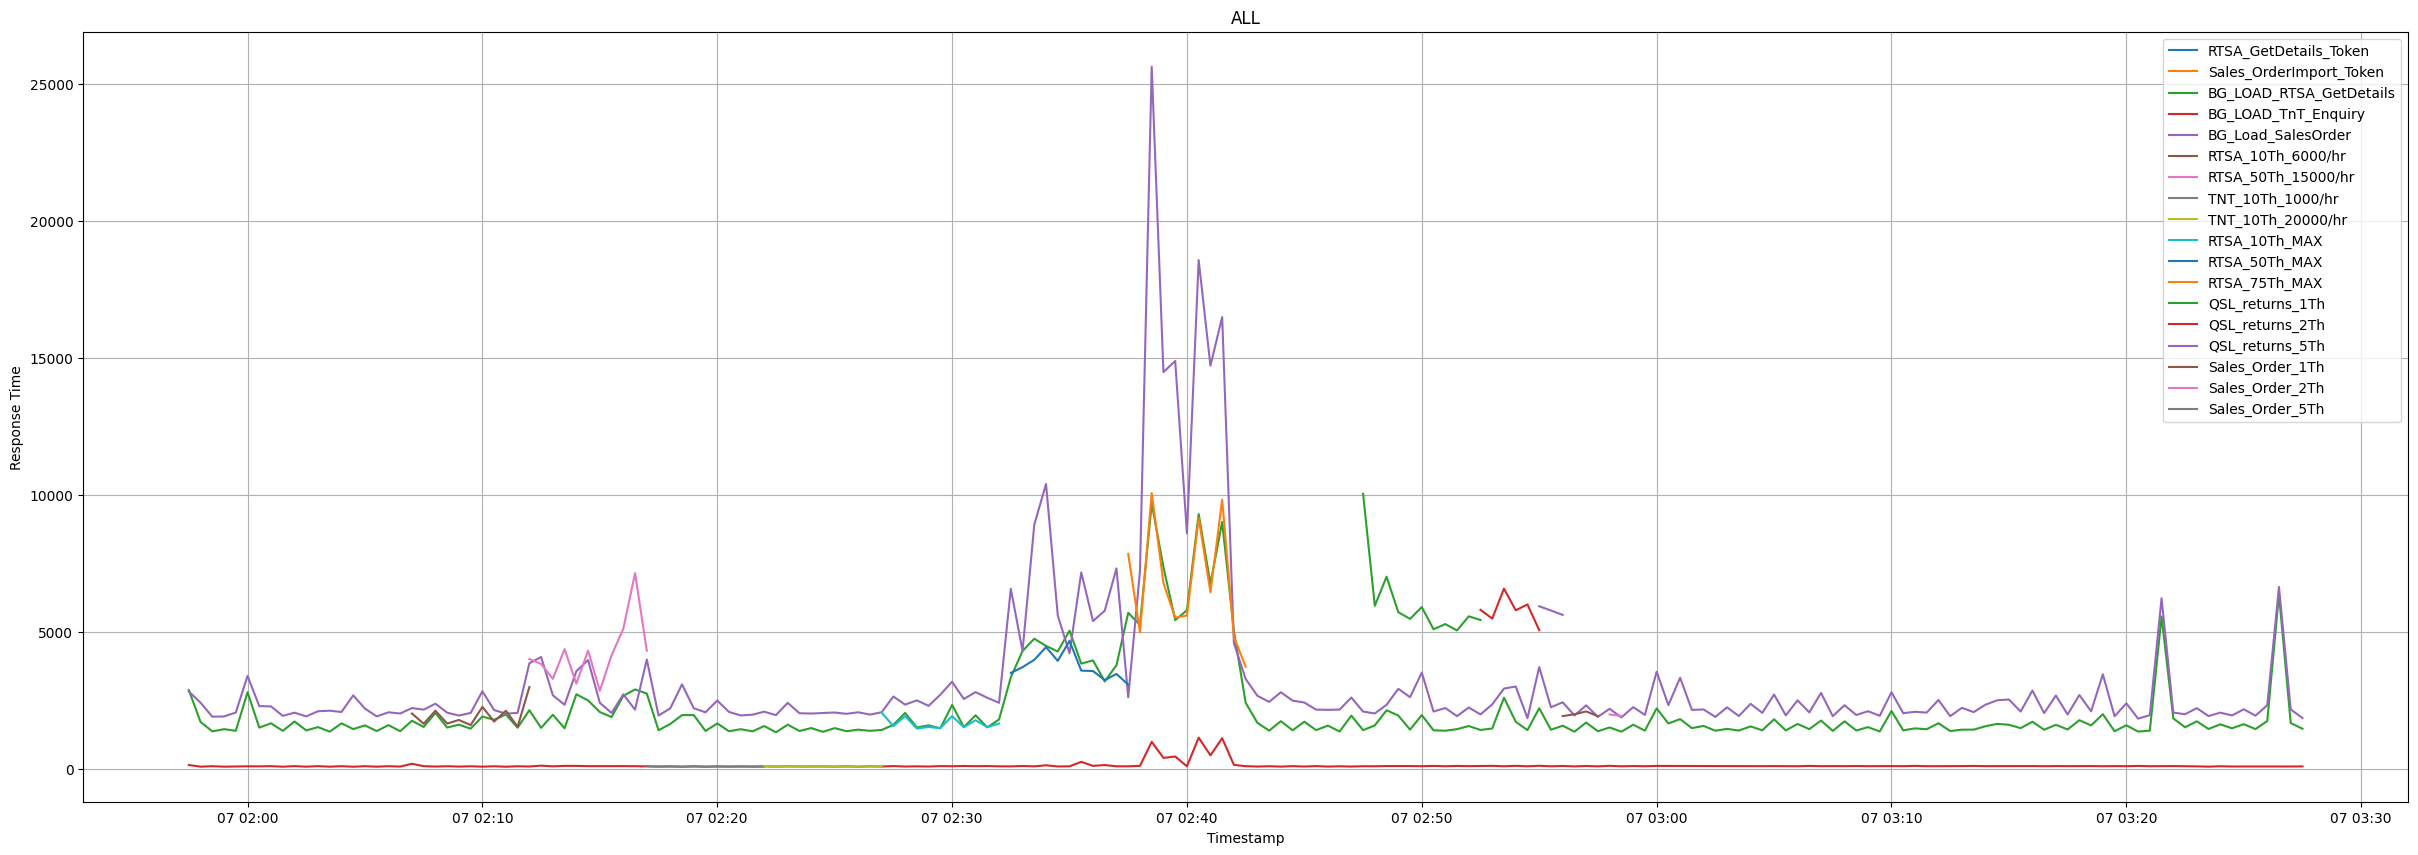

In [8]:
'''

['RTSA_GetDetails_Token', 'Sales_OrderImport_Token',
       'TnT Token Request', 'BG_LOAD_RTSA_GetDetails',
       'BG_LOAD_TnT_Enquiry', 'BG_Load_SalesOrder', 'Token Request',
       'RTSA_10Th_6000/hr', 'RTSA_50Th_15000/hr', 'TNT_10Th_1000/hr',
       'TNT_10Th_20000/hr', 'RTSA_10Th_MAX', 'RTSA_50Th_MAX',
       'RTSA_75Th_MAX', 'QSL_returns_1Th', 'QSL_returns_2Th',
       'QSL_returns_5Th', 'Sales_Order_1Th', 'Sales_Order_2Th',
       'Sales_Order_5Th', 'WG_1Th', 'WG_2Th', 'WG_5Th']
'''
#(19545.078472222223, 19545.147222222222)


# Set up the figure and axis
plt.rcParams["figure.figsize"] = [30, 10]

fig, ax = plt.subplots()


# Plot a line for each label
for label, d in interval_dataframes.items():
    # Convert the index (timeStamp) to a column for plotting
    
    if label[:3] in ['TNT', 'RTS']:
        print(label)
        dataframe = d.reset_index()
        # Plot the line for the label
        ax.plot(dataframe['timeStamp'], dataframe['avg_res'], label=label)
        
    if label[:3] in ['QSL', 'WG', 'Sal']:
        print(label)
        dataframe = d.reset_index()
        # Plot the line for the label
        ax.plot(dataframe['timeStamp'], dataframe['avg_res'], label=label)
        
    if label[:2] == 'BG':
        print(label)
        dataframe = d.reset_index()
        # Plot the line for the label
        ax.plot(dataframe['timeStamp'], dataframe['avg_res'], label=label)

# Set the x-axis label and format
ax.set_xlabel('Timestamp')
ax.set_xlim((19545.078472222223, 19545.147222222222))
# Set the y-axis label
ax.set_ylabel('Response Time')

# Set the title
ax.set_title('ALL')

# Add a legend
ax.legend()

# Rotate the x-axis tick labels for better visibility (optional)
# plt.xticks(rotation=45)
plt.grid()
# Display the plot
plt.show()

In [9]:
s = 'BG_LOAD_RTSA_GetDetails'
s[:2]

'BG'

In [10]:
def time_series(big_df, df_dict, focus_labels, bg_labels):
    '''
    Create a time series graph 
    
    X axis is confined by the 'focus labels'
    '''
    fig, ax = plt.subplots()


    # Plot a line for each label
    for label, d in df_dict.items():
    # Convert the index (timeStamp) to a column for plotting
    
        if label in focus_labels:
            dataframe = d.reset_index()
            # Plot the line for the label
            ax.plot(dataframe['timeStamp'], dataframe['avg_res'], label=label, linewidth =3)
        
        elif label in bg_labels:
            dataframe = d.reset_index()
            # Plot the line for the label
            ax.plot(dataframe['timeStamp'], dataframe['avg_res'], label=label, ls='--', alpha = 0.5)
    
    min_focus = pd.to_datetime(np.min(big_df[big_df['label'].isin(focus_labels)]['timeStamp']),unit = 'ms')
    max_focus = pd.to_datetime(np.max(big_df[big_df['label'].isin(focus_labels)]['timeStamp']), unit = 'ms')
    # Set the x-axis label and format 
    ax.set_xlim(min_focus, max_focus)
    # Set the y-axis label
    ax.set_ylabel('Response Time')

    print("Test" + str(big_df[big_df['label'].isin(focus_labels)]['timeStamp']))

    # Set the title
    ax.set_title('Graph')

    # Add a legend
    ax.legend()

    # Rotate the x-axis tick labels for better visibility (optional)
    plt.xticks(rotation=45)
    plt.grid()
    # Display the plot
    plt.show()
    
    
    

Test1956     1688695622581
1957     1688695622582
1958     1688695622583
1959     1688695622584
1960     1688695622585
             ...      
23475    1688697761173
23476    1688697761179
23478    1688697761211
23479    1688697761291
23480    1688697761352
Name: timeStamp, Length: 11190, dtype: int64


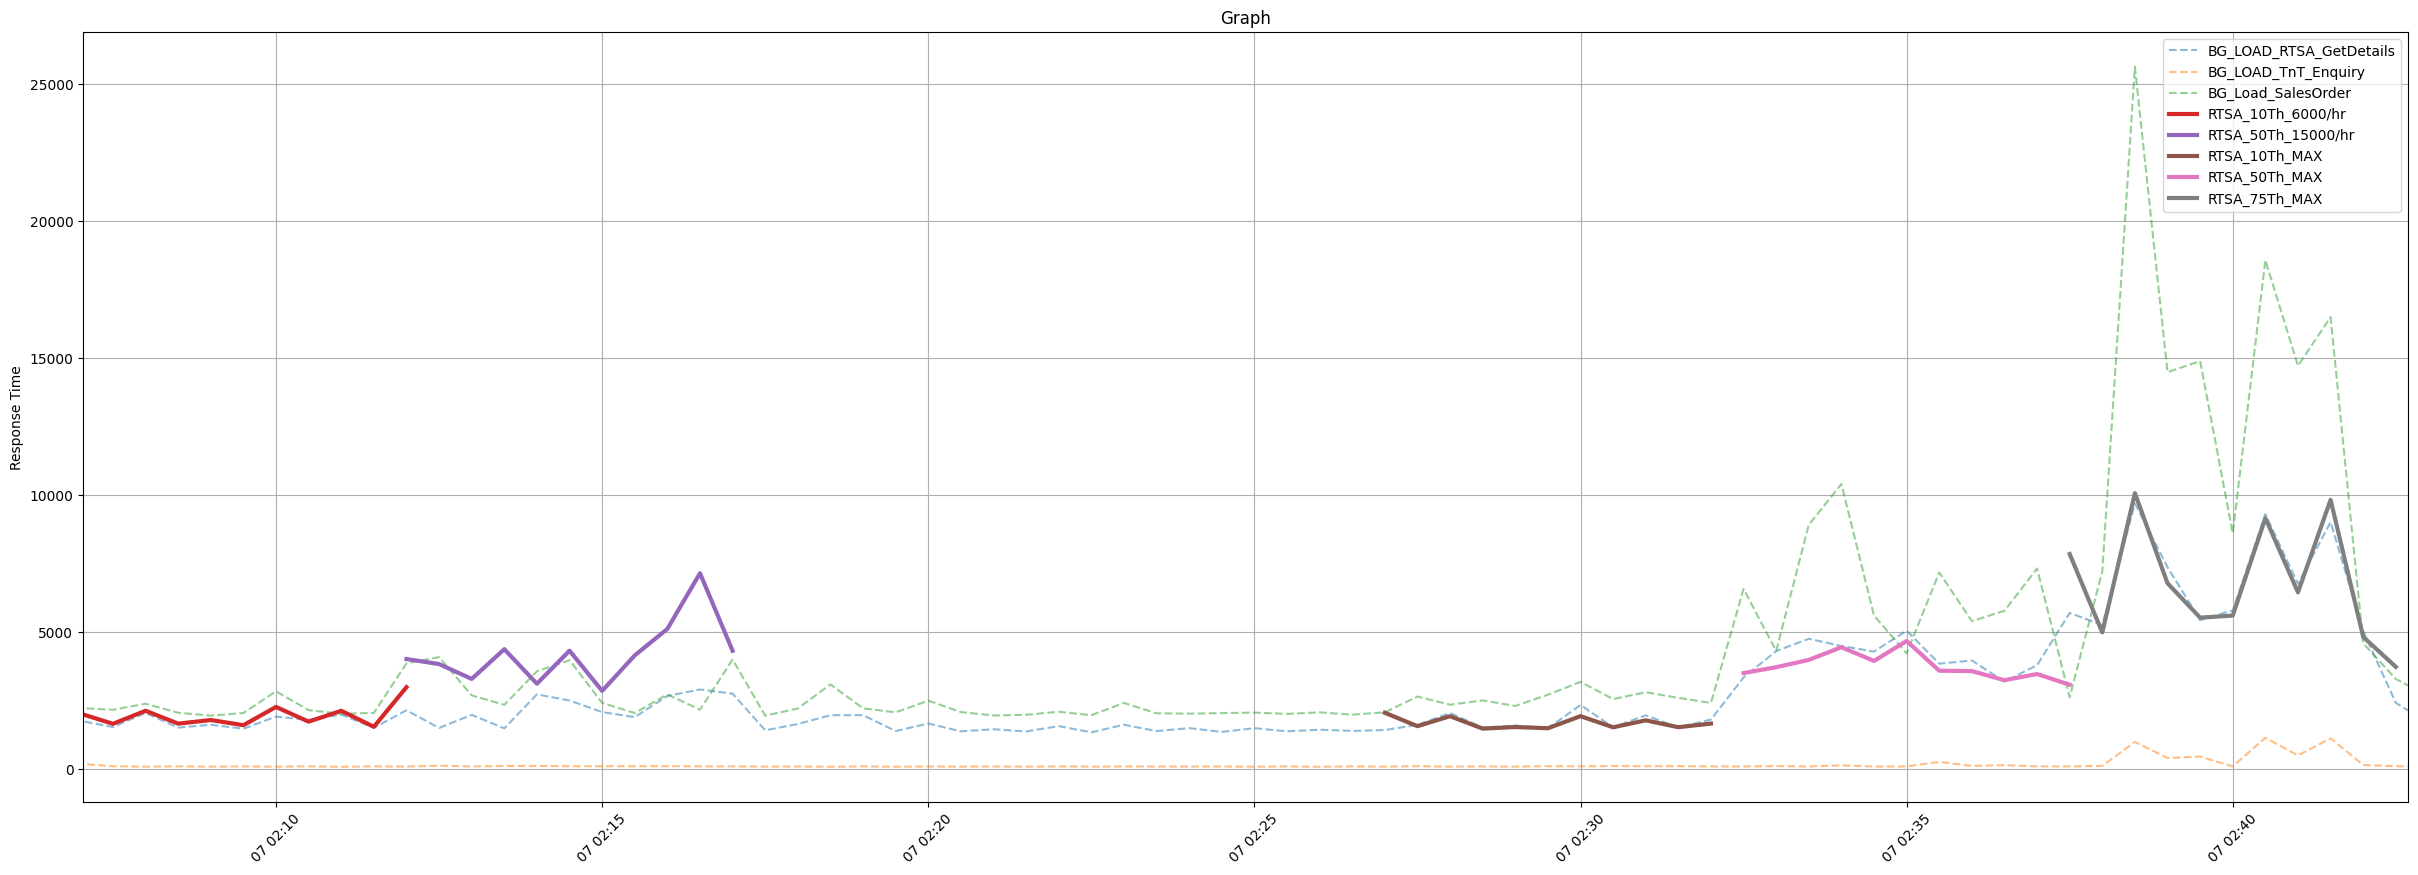

In [11]:
foc = ['RTSA_10Th_MAX','RTSA_50Th_MAX','RTSA_75Th_MAX', 'RTSA_10Th_6000/hr','RTSA_50Th_15000/hr']
bg = ['BG_LOAD_RTSA_GetDetails', 'BG_LOAD_TnT_Enquiry', 'BG_Load_SalesOrder']
time_series(df,interval_dataframes, foc, bg)

Test24583    1688698076235
24621    1688698086270
24652    1688698094934
24670    1688698099898
24690    1688698104734
             ...      
27896    1688698893647
27897    1688698893687
27898    1688698893887
27899    1688698893969
27905    1688698895306
Name: timeStamp, Length: 450, dtype: int64


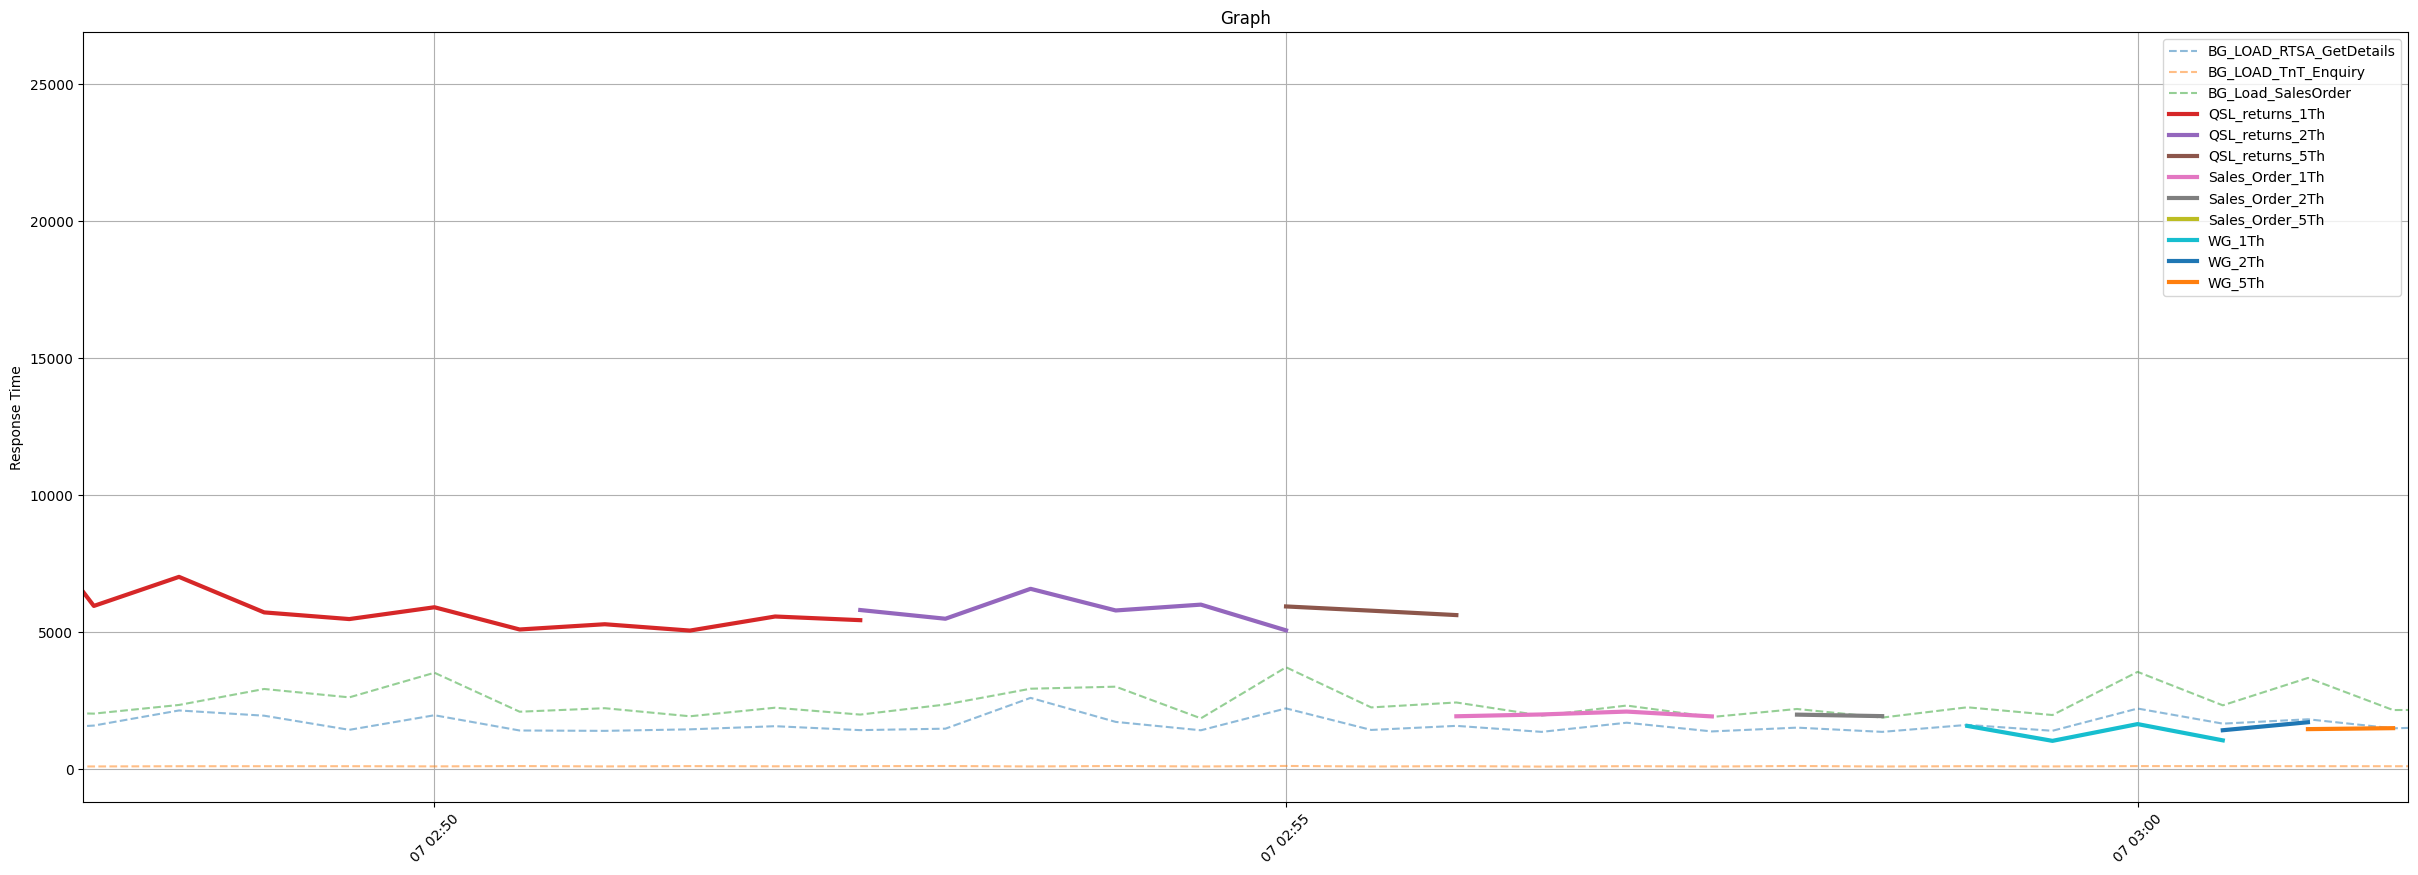

In [12]:
foc = ['QSL_returns_1Th', 'QSL_returns_2Th',
       'QSL_returns_5Th', 'Sales_Order_1Th', 'Sales_Order_2Th',
       'Sales_Order_5Th', 'WG_1Th', 'WG_2Th', 'WG_5Th']
bg = ['BG_LOAD_RTSA_GetDetails', 'BG_LOAD_TnT_Enquiry', 'BG_Load_SalesOrder']
time_series(df,interval_dataframes, foc, bg)

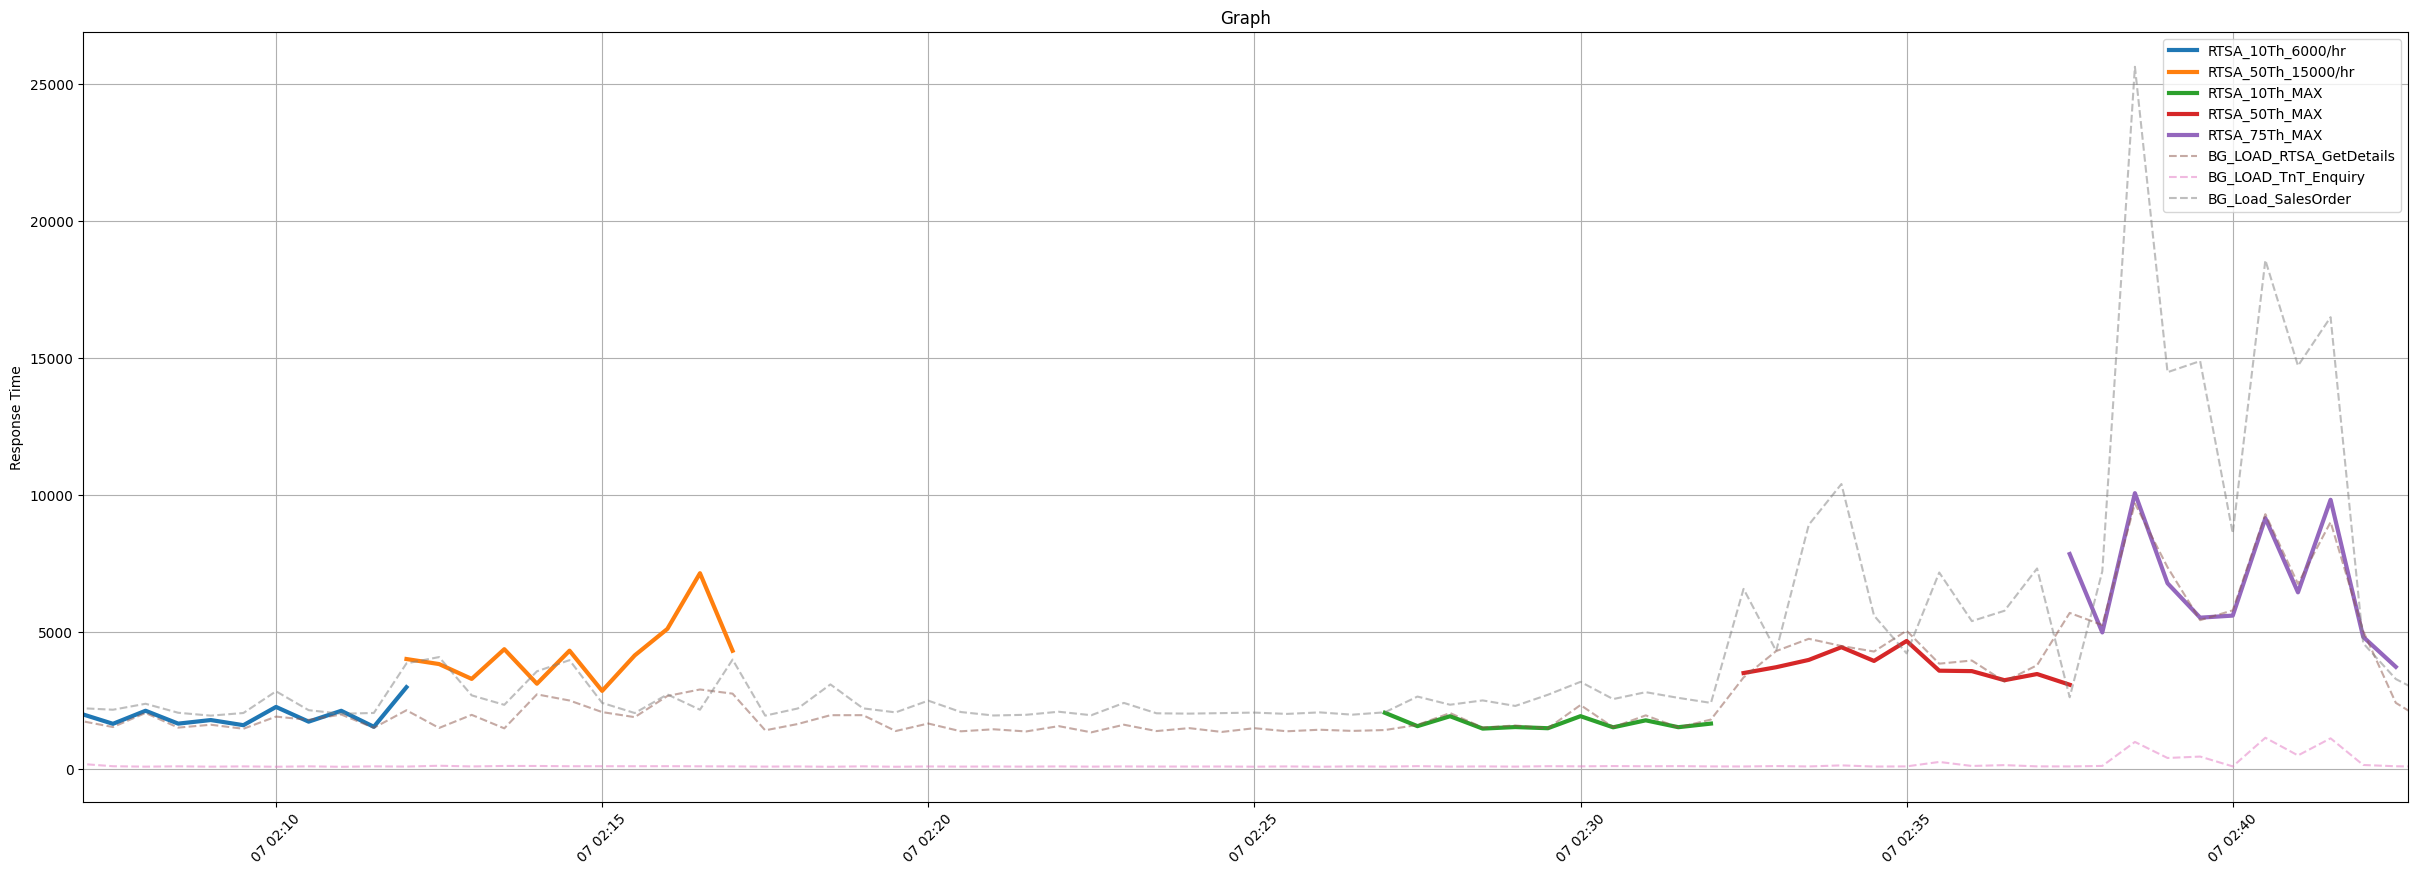

In [13]:
from graphing import Test

foc = ['RTSA_10Th_MAX','RTSA_50Th_MAX','RTSA_75Th_MAX', 'RTSA_10Th_6000/hr','RTSA_50Th_15000/hr']
bg = ['BG_LOAD_RTSA_GetDetails', 'BG_LOAD_TnT_Enquiry', 'BG_Load_SalesOrder']

test = Test.read_test('logs_dress_all2.csv')
test.time_series_by_labels(foc, bg)

In [4]:
%load_ext autoreload

c:\Users\akeshmistry\OneDrive - Deloitte (O365D)\Documents\Source\PerfTestingVisualization\graphing.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.results["Segment"] = -1
c:\Users\akeshmistry\OneDrive - Deloitte (O365D)\Documents\Source\PerfTestingVisualization\graphing.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.results.loc[


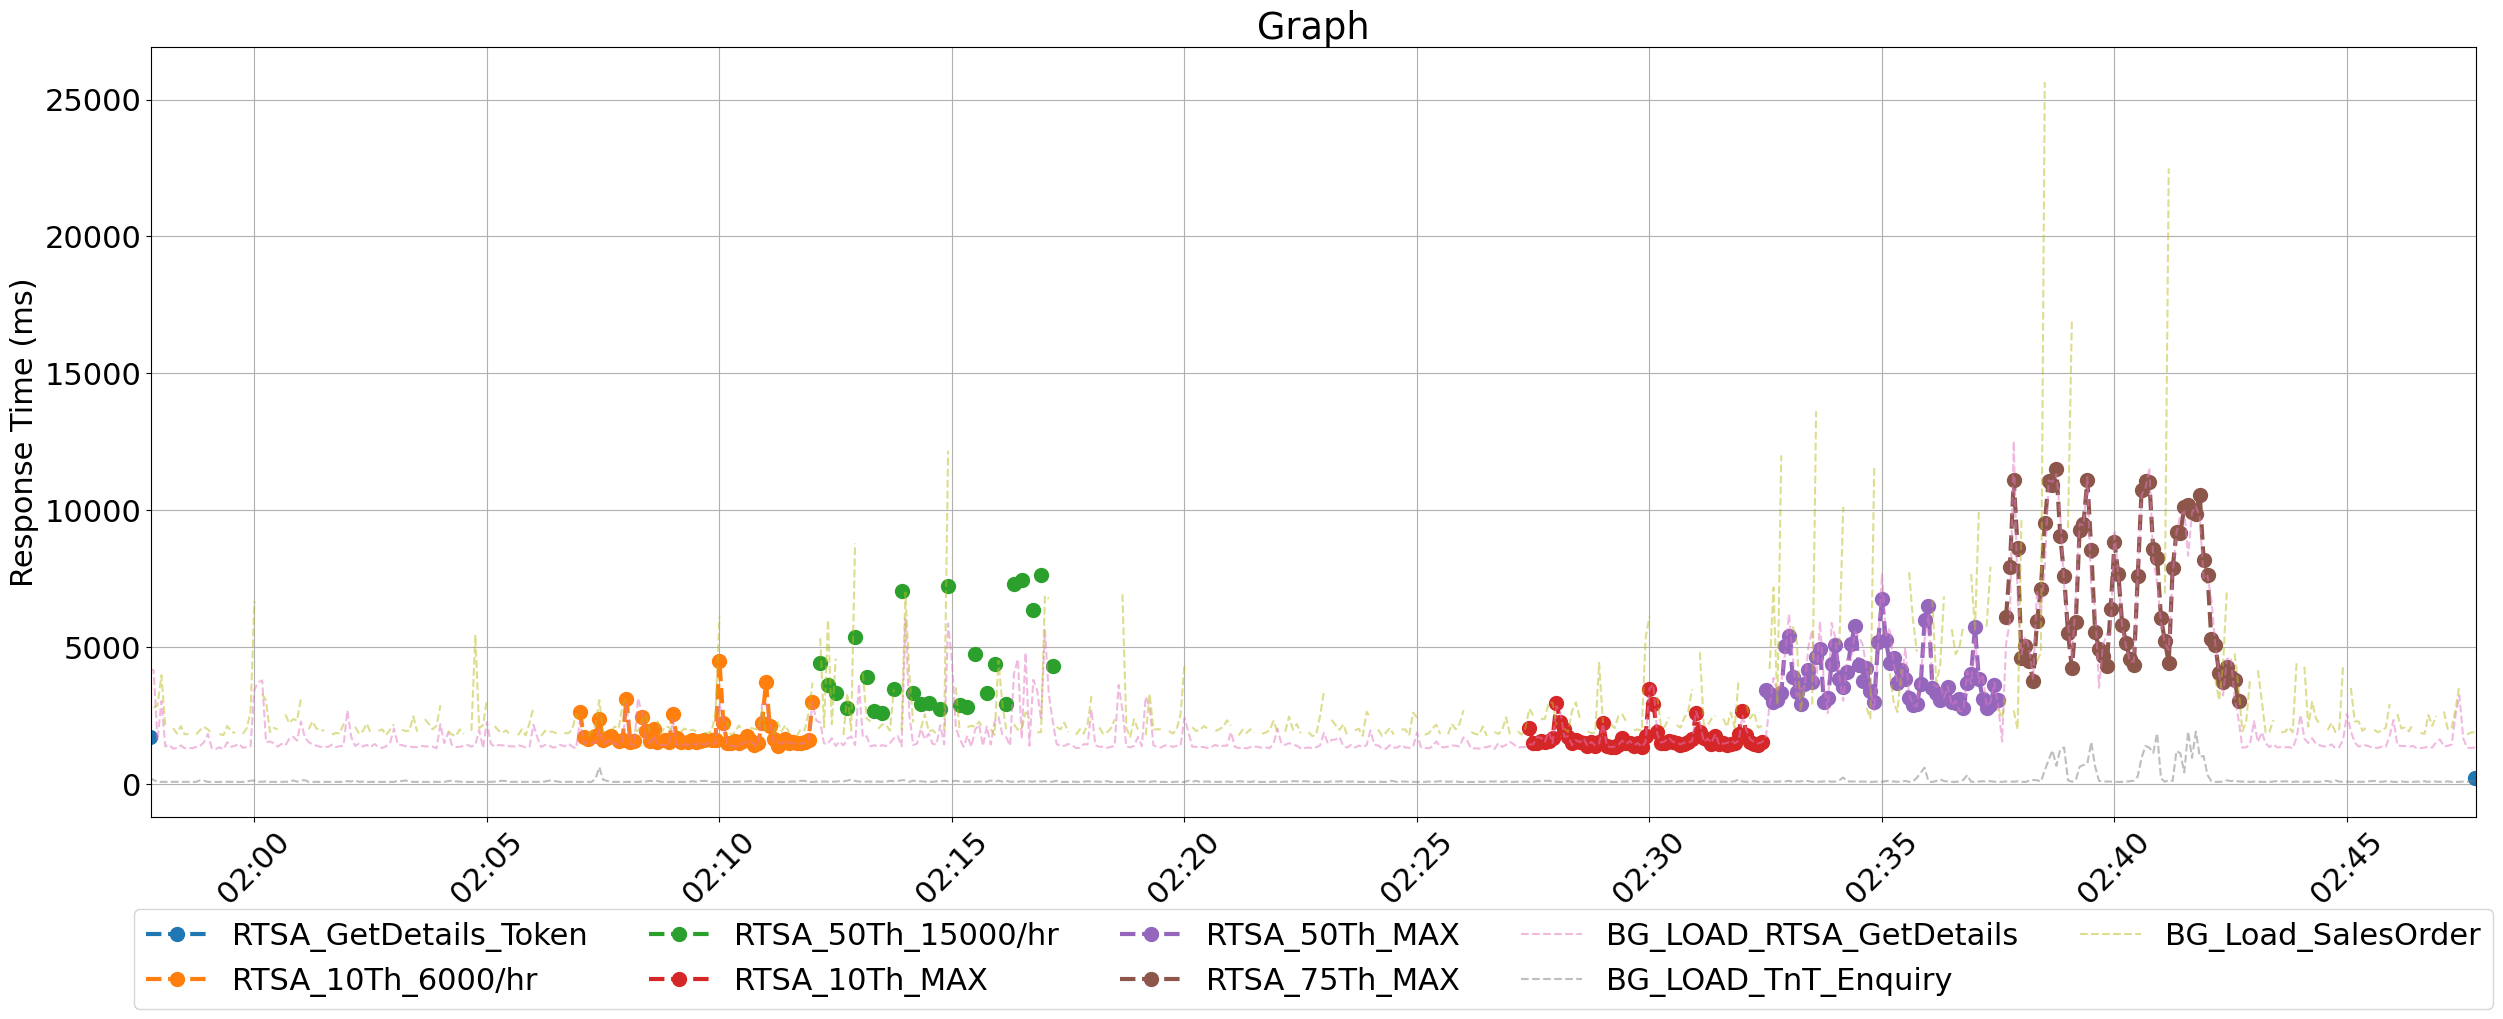

In [11]:
%autoreload

from graphing import Test

foc = "RTSA"
bg = "BG"

test = Test.read_test('logs_dress_all2.csv', 5)

test.time_series_by_categories(foc, bg, "Graph", "avg_res")